In [113]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [15]:
signal, fs = librosa.load('C:\\Users\\JEREMYL\\Documents\\006.wav')

In [31]:
data_dir = "D:\\lung sounds\\rambam"

In [32]:
metadata = pd.read_csv(os.path.join(data_dir, 'labels_modified.csv'))

In [33]:
metadata.head()

,id,name,taz,age,gender,weight,height,label
0,1,Hava Ron,21243653,21,M,NaN,NaN,Asthma
1,2,Kachlon Einav,40814436,41,F,NaN,NaN,Asthma
2,3,Shechter Pola,15612575,57,F,67.0,190.0,Pneumonia
3,4,Boys Tal,204749030,29,M,78.0,172.0,Dyspnea - Pericarditis
4,5,Banay Tikva,50943521,71,F,72.0,165.0,Small Cell Lung Cancer


## Remove txt files in kaggle database

In [46]:
data_dir = 'D:\\lung sounds\\kaggle'

In [38]:
for file_name in os.listdir('D:\\lung sounds\\kaggle\\recordings'):
    if file_name.endswith('txt'):
        os.remove(os.path.join('D:\\lung sounds\\kaggle\\recordings', file_name)) 

In [47]:
len(os.listdir('D:\\lung sounds\\kaggle\\recordings'))

918

In [48]:
metadata = pd.read_csv(os.path.join(data_dir, 'labels.csv'))

In [49]:
metadata.head()

,ID,Label
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [50]:
with open(os.path.join(data_dir, 'demographic_info.txt')) as f:
    lines = f.readlines()

In [78]:
id_list, age_list, sex_list, bmi_list = [], [], [], []
for i, line in enumerate(lines):
    if i == 0:
        continue
    line_splitted = line.split(' ')
    
    id_list.append(line_splitted[0])
    age_list.append(line_splitted[1])
    sex_list.append(line_splitted[2])
    bmi_list.append(line_splitted[3])

In [79]:
bmi_list

['NA',
 'NA',
 '33',
 '28.47',
 'NA',
 '21',
 '33.7',
 'NA',
 '33.53',
 '25.21',
 '28.4',
 '22.86',
 '28.41',
 '23.12',
 'NA',
 '28.58',
 '24.4',
 '36.76',
 'NA',
 '35.14',
 'NA',
 '33',
 'NA',
 '29.07',
 'NA',
 'NA',
 'NA',
 '24.3',
 'NA',
 '17.1',
 'NA',
 '34',
 '27.4',
 '32',
 '21',
 'NA',
 'NA',
 '21.6',
 '28.68',
 '23',
 '22.4',
 '26.1',
 'NA',
 'NA',
 '23.4',
 '28',
 '25.7',
 'NA',
 'NA',
 'NA',
 '28.4',
 'NA',
 'NA',
 '28.1',
 '26',
 '22.9',
 '53.5',
 '16.5',
 'NA',
 '27.4',
 'NA',
 '24.9',
 '28.3',
 'NA',
 'NA',
 '25.06',
 'NA',
 '17.35',
 '28.81',
 '22.6',
 'NA',
 '29.3',
 'NA',
 '26.4',
 '28.34',
 '30.1',
 '22.1',
 '30.1',
 'NA',
 '29.03',
 '26.4',
 'NA',
 'NA',
 'NA',
 '27.7',
 '30',
 'NA',
 'NA',
 '26.2',
 'NA',
 '36',
 '28',
 '26.3',
 'NA',
 '29.41',
 '25.5',
 'NA',
 '18.6',
 '20',
 '27.8',
 '28.52',
 'NA',
 '24',
 '29.76',
 '20.1',
 'NA',
 '29.6',
 'NA',
 'NA',
 'NA',
 '31.1',
 '23',
 '24.7',
 'NA',
 '25.35',
 'NA',
 'NA',
 '26.29',
 '26',
 '35.4',
 '29',
 'NA',
 'NA',
 '

In [80]:
metadata_add = pd.DataFrame({
    'ID': id_list,
    'age': age_list,
    'sex': sex_list,
    'bmi': bmi_list,
    'label': metadata.Label.values
})

In [81]:
metadata_add.head()

,ID,age,sex,bmi,label
0,101,3,F,NA,URTI
1,102,0.75,F,NA,Healthy
2,103,70,F,33,Asthma
3,104,70,F,28.47,COPD
4,105,7,F,NA,URTI


In [82]:
metadata_add.to_csv(os.path.join(data_dir, 'labels.csv'), index=False)

# KAUH

In [83]:
data_dir = 'D:\\lung sounds\\KAUH'

In [88]:
labels = pd.read_csv(os.path.join(data_dir, 'labels.csv'))

In [89]:
labels.head()

,Age,Gender,Location,Sound type,Diagnosis
0,70,M,P L L,I E W,Asthma
1,52,F,P L L,E W,Asthma
2,50,F,P L L,I E W,Asthma
3,72,F,P R L,I C,Heart Failure + Lung Fibrosis
4,71,M,P R L,I C E W,Heart Failure + COPD


In [90]:
labels.shape

(112, 5)

In [91]:
len(os.listdir('D:\\lung sounds\\KAUH\\AudioFiles'))

336

In [101]:
label_list, id_list, age_list, sex_list = [], [], [], []
for i, filename in enumerate(os.listdir('D:\\lung sounds\\KAUH\\AudioFiles')):
    filename_split = filename.split('.')[0].split(',')
    print(filename, filename_split)
    
    label_list.append(filename_split[0].split('_')[1])
    id_list.append(i)
    age_list.append(filename_split[3])
    sex_list.append(filename_split[4])
    
    os.rename(os.path.join('D:\\lung sounds\\KAUH\\AudioFiles', filename), 
              os.path.join('D:\\lung sounds\\KAUH\\AudioFiles', str(i) + '.wav'))

BP100_N,N,P R M,70,F.wav ['BP100_N', 'N', 'P R M', '70', 'F']
BP101_Asthma,E W,P L M,12,F.wav ['BP101_Asthma', 'E W', 'P L M', '12', 'F']
BP102_N,N,P L L,41,M.wav ['BP102_N', 'N', 'P L L', '41', 'M']
BP103_N,N,P R U,81,F.wav ['BP103_N', 'N', 'P R U', '81', 'F']
BP104_Asthma,E W,P L U,45,F.wav ['BP104_Asthma', 'E W', 'P L U', '45', 'F']
BP105_Lung Fibrosis,Crep,A U R,44,M.wav ['BP105_Lung Fibrosis', 'Crep', 'A U R', '44', 'M']
BP106_Asthma,E W,P L U,45,F.wav ['BP106_Asthma', 'E W', 'P L U', '45', 'F']
BP107_Asthma,E W,P L U,59,F.wav ['BP107_Asthma', 'E W', 'P L U', '59', 'F']
BP108_COPD,E W,P R L ,63,M.wav ['BP108_COPD', 'E W', 'P R L ', '63', 'M']
BP109_N,N,P L M,26,M.wav ['BP109_N', 'N', 'P L M', '26', 'M']
BP10_Asthma,E W,P R U,59,M.wav ['BP10_Asthma', 'E W', 'P R U', '59', 'M']
BP110_COPD,E W,P L L,62,M.wav ['BP110_COPD', 'E W', 'P L L', '62', 'M']
BP111_COPD,E W,P R L ,51,M.wav ['BP111_COPD', 'E W', 'P R L ', '51', 'M']
BP112_N,N,P L M,30,M.wav ['BP112_N', 'N', 'P L M', '30', 'M']


DP7_Heart Failure + COPD,I C E W,P L R,65,M.wav ['DP7_Heart Failure + COPD', 'I C E W', 'P L R', '65', 'M']
DP80_asthma,E W,A L U,38,M.wav ['DP80_asthma', 'E W', 'A L U', '38', 'M']
DP81_N,N,P L U,33,M.wav ['DP81_N', 'N', 'P L U', '33', 'M']
DP82_N,N,P L U,38,M.wav ['DP82_N', 'N', 'P L U', '38', 'M']
DP83_N,N,A R U,18,F.wav ['DP83_N', 'N', 'A R U', '18', 'F']
DP84_N,N,A R U,65,F.wav ['DP84_N', 'N', 'A R U', '65', 'F']
DP85_N,N,A R U,33,M.wav ['DP85_N', 'N', 'A R U', '33', 'M']
DP86_N,N,P R U,68,F.wav ['DP86_N', 'N', 'P R U', '68', 'F']
DP87_N,N,P R M,72,M.wav ['DP87_N', 'N', 'P R M', '72', 'M']
DP88_N,N,A R U,29,M.wav ['DP88_N', 'N', 'A R U', '29', 'M']
DP89_N,N,P L M,70,M.wav ['DP89_N', 'N', 'P L M', '70', 'M']
DP8_Plueral Effusion,I C B,P L L,70,M.wav ['DP8_Plueral Effusion', 'I C B', 'P L L', '70', 'M']
DP90_heart failure,Crep,P L M,74,F.wav ['DP90_heart failure', 'Crep', 'P L M', '74', 'F']
DP91_asthma,E W,P R U,43,F.wav ['DP91_asthma', 'E W', 'P R U', '43', 'F']
DP92_N,N,P L L ,43

In [102]:
metadata = pd.DataFrame({
    'ID': id_list,
    'age': age_list,
    'label': label_list,
    'sex': sex_list
})

In [105]:
metadata.to_csv(os.path.join('D:\\lung sounds\\KAUH', 'labels.csv'), index=False)

# EDA all database - metadata

In [108]:
metadata_rambam = pd.read_csv('D:\\lung sounds\\rambam\\labels.csv')
metadata_kaggle = pd.read_csv('D:\\lung sounds\\kaggle\\labels.csv')
metadata_kauh = pd.read_csv('D:\\lung sounds\\kauh\\labels.csv')

In [109]:
metadata_rambam.head()

,id,name,taz,age,gender,weight,height,label
0,1,Hava Ron,21243653,21,M,NaN,NaN,Asthma
1,2,Kachlon Einav,40814436,41,F,NaN,NaN,Asthma
2,3,Shechter Pola,15612575,57,F,67.0,190.0,Pneumonia
3,4,Boys Tal,204749030,29,M,78.0,172.0,Dyspnea - Pericarditis
4,5,Banay Tikva,50943521,71,F,72.0,165.0,Small Cell Lung Cancer


In [110]:
metadata_kaggle.head()

,ID,age,sex,bmi,label
0,101,3.00,F,NaN,URTI
1,102,0.75,F,NaN,Healthy
2,103,70.00,F,33.00,Asthma
3,104,70.00,F,28.47,COPD
4,105,7.00,F,NaN,URTI


In [111]:
metadata_kauh.head()

,ID,age,label,sex
0,0,70,N,F
1,1,12,Asthma,F
2,2,41,N,M
3,3,81,N,F
4,4,45,Asthma,F


In [115]:
print('rambam', np.unique(metadata_rambam.label))
print('kaggle', np.unique(metadata_kaggle.label))
print('kauh', np.unique(metadata_kauh.label))

rambam ['Asthma' 'Bronchiectasis' 'COPD' 'COPD + Lung Fibrosis'
 'COPD + Pneumonia' 'COPD with Lung Embolism' 'Dyspnea - Pericarditis'
 'Emphysema' 'Interstitial Lung Disease' 'Lung Adenocarcinoma'
 'Mycobacterium Simiae' 'Pneumonia' 'Pneumonitis'
 'Pulmonary Hypertension + Interstitial Lung Disease'
 'Right Pleural Effusion' 'Small Cell Lung Cancer' 'Tracheal Amyloidosis'
 'Tracheal Stenosis']
kaggle ['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'LRTI'
 'Pneumonia' 'URTI']
kauh ['Asthma' 'Asthma and lung fibrosis' 'BRON' 'COPD' 'Heart Failure'
 'Heart Failure + COPD' 'Heart Failure + Lung Fibrosis ' 'Lung Fibrosis'
 'N' 'Plueral Effusion' 'asthma' 'copd' 'heart failure' 'pneumonia']


In [116]:
metadata_kauh = pd.read_csv('D:\\lung sounds\\kauh\\labels_modified.csv')

In [117]:
metadata_kauh.tail()

,ID,age,label,sex
331,331,66,N,F
332,332,24,Asthma,M
333,333,53,N,M
334,334,50,N,M
335,335,59,Asthma,M


In [121]:
metadata_kauh = metadata_kauh.replace('N', 'Healthy')
metadata_kauh = metadata_kauh.replace('asthma', 'Asthma')
metadata_kauh = metadata_kauh.replace('copd', 'COPD')
metadata_kauh = metadata_kauh.replace('pneumonia', 'Pneumonia')
metadata_kauh = metadata_kauh.replace('heart failure', 'Heart Failure')
metadata_kauh = metadata_kauh.replace('Asthma and lung fibrosis', 'Asthma + Lung Fibrosis')
metadata_kauh = metadata_kauh.replace('Heart Failure + Lung Fibrosis ', 'Heart Failure + Lung Fibrosis')

In [125]:
metadata_rambam = metadata_rambam.replace('COPD with Lung Embolism', 'COPD')

In [122]:
print('kauh', np.unique(metadata_kauh.label))

kauh ['Asthma' 'Asthma + Lung Fibrosis' 'BRON' 'COPD' 'Healthy' 'Heart Failure'
 'Heart Failure + COPD' 'Heart Failure + Lung Fibrosis' 'Lung Fibrosis'
 'Plueral Effusion' 'Pneumonia']


In [123]:
print('kaggle', np.unique(metadata_kaggle.label))

kaggle ['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'LRTI'
 'Pneumonia' 'URTI']


In [126]:
print('rambam', np.unique(metadata_rambam.label))

rambam ['Asthma' 'Bronchiectasis' 'COPD' 'COPD + Lung Fibrosis'
 'COPD + Pneumonia' 'Dyspnea - Pericarditis' 'Emphysema'
 'Interstitial Lung Disease' 'Lung Adenocarcinoma' 'Mycobacterium Simiae'
 'Pneumonia' 'Pneumonitis'
 'Pulmonary Hypertension + Interstitial Lung Disease'
 'Right Pleural Effusion' 'Small Cell Lung Cancer' 'Tracheal Amyloidosis'
 'Tracheal Stenosis']


In [141]:
labels_keep = ['COPD', 'Asthma', 'Bronchiectasis', 'Bronchiolitis', 'Healthy', 'LRTI', 'Pneumonia', 'URTI', 'Lung Fibrosis', 
              'Heart Failure']

In [152]:
def plot_distribution(ax, label_list):
    label_list_reformated = []
    for label in label_list:
        if '+' in label:
            label_1 = label.split('+')[0]
            label_2 = label.split('+')[1]
            
            if label_1 in labels_keep:
                label_list_reformated.append(label_1)
            if label_2 in labels_keep:
                label_list_reformated.append(label_2)
        else:
            if label in labels_keep:
                label_list_reformated.append(label)
    
#     plt.figure()
    ax.hist(label_list_reformated, bins=len(np.unique(label_list)))
#     ax.xticks(rotation = 45)
    ax.tick_params('x', labelrotation=45)

#     plt.savefig(os.path.join('C:\\Users\\JEREMYL\\OneDrive - Technion (1)\\MSc\\Research\\Lung sounds\\figures', filename))
#     plt.show()

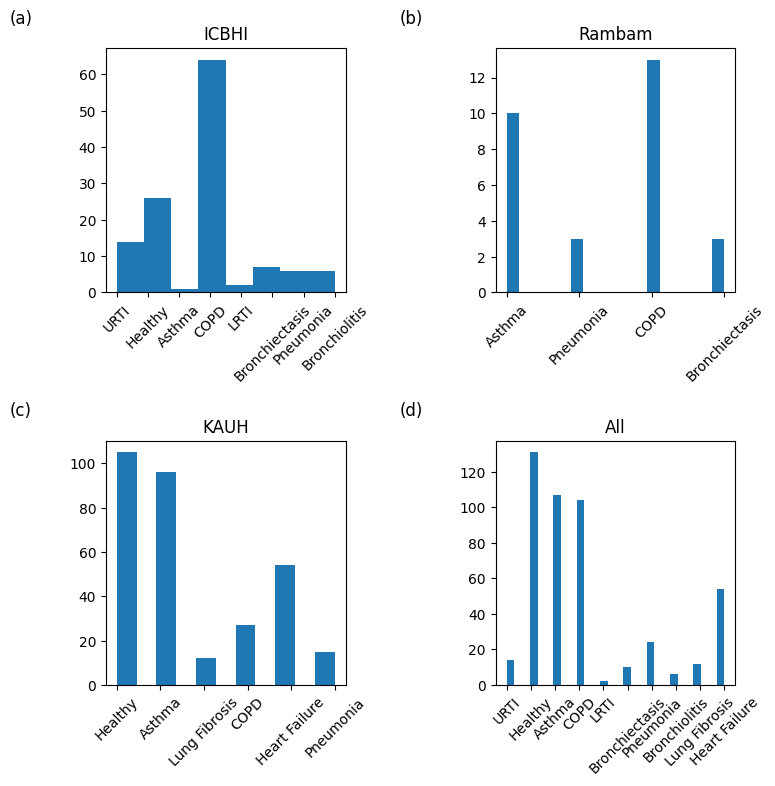

In [160]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
x_pos, y_pos = -0.4, 1.1
letter_fontsize = 12

plot_distribution(axes[0, 0], metadata_kaggle.label)
plot_distribution(axes[0, 1], metadata_rambam.label)
plot_distribution(axes[1, 0], metadata_kauh.label)
plot_distribution(axes[1, 1], np.concatenate((metadata_kaggle.label, metadata_rambam.label, metadata_kauh.label)))

axes[0][0].text(x_pos, y_pos, "(a)", fontsize=letter_fontsize, transform=axes[0][0].transAxes)
axes[0][1].text(x_pos, y_pos, "(b)", fontsize=letter_fontsize, transform=axes[0][1].transAxes)
axes[1][0].text(x_pos, y_pos, "(c)", fontsize=letter_fontsize, transform=axes[1][0].transAxes)
axes[1][1].text(x_pos, y_pos, "(d)", fontsize=letter_fontsize, transform=axes[1][1].transAxes)

axes[0][0].title.set_text('ICBHI')
axes[0][1].title.set_text('Rambam')
axes[1][0].title.set_text('KAUH')
axes[1][1].title.set_text('All')

fig.tight_layout()
fig.savefig(os.path.join('C:\\Users\\JEREMYL\\OneDrive - Technion (1)\\MSc\\Research\\Lung sounds\\figures', 'all_labels'))